<a href="https://colab.research.google.com/github/themysterysolver/QR-CIP/blob/main/CODE/QR_MODULE_1_PREP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
!pip install qrcode

In [59]:
import qrcode
from IPython.display import display

In [60]:
myStr="AOT"
qr=qrcode.make(myStr)

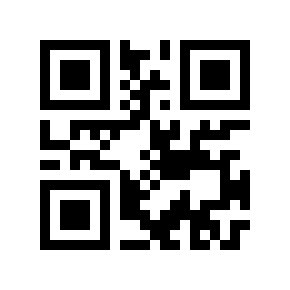

In [61]:
display(qr)

In [62]:
qr.save('qr.png')

In [63]:
import random
random.seed(404)
permutation=random.sample(range(0,16),16)
print(permutation)

[2, 14, 6, 0, 8, 1, 9, 10, 5, 11, 3, 12, 4, 15, 13, 7]


In [64]:
!pip install opencv-python

In [65]:
import cv2
import numpy as np
import random
import os

### DIVIDER:
> **Note**:Resize qr to be perfectly divided by 4

- Divides the qr using `imread`
- `bb` stores the `16` `n*n` matrix *pixels*
- `imread` read the pixels.
- `bb`-block after I divided

In [92]:
def divide_qr(path):
    blocks=[]
    img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    #print(type(img),img.shape)
    #for row in img:
    #  print(row)
    if img is None:
      print('divide_qr:NOT FOUND')
      return
    if img.shape[0] % 4 != 0 or img.shape[1] % 4 != 0:
        img = cv2.resize(img, (400, 400))
    bsize=img.shape[0]//4
    for i in range(4):
      for j in range(4):
        block=img[i*bsize:(i+1)*bsize,j*bsize:(j+1)*bsize]
        blocks.append(block)
    return np.array(blocks)


path="qr.png"
bb=divide_qr(path)
print(len(bb),type(bb),bb.shape)

16 <class 'numpy.ndarray'> (16, 100, 100)


### SCRAMBLE
- scrambles the qr code,for the found block(`'bb`).
- Scramble as per our `pemrutatipon`
- `sb`-scrambled blocks

In [93]:
def scramble_qr(permutation,blocks):
  scramble=[None]*16
  for idx,p in enumerate(blocks):
    scramble[idx]=blocks[permutation[idx]]
  return np.array(scramble)


sb=scramble_qr(permutation,bb)
print(type(sb),sb.shape)

<class 'numpy.ndarray'> (16, 100, 100)


### DESCRAMBLE
- Returning the *orginal array* form `permutation`.


In [99]:
def descramble_qr(permutation,sb):
  ogb=[None]*16
  inv=[0]*len(permutation)
  for idx,p in enumerate(permutation):
    inv[p]=idx
  for idx,p in enumerate(inv):
    ogb[idx]=sb[p]
  return np.array(ogb)


ogb=descramble_qr(permutation,sb)
print(type(ogb),ogb.shape)

<class 'numpy.ndarray'> (16, 100, 100)


### REBUILDING QR-MERGE
- merging all the blocks `16`

In [100]:
def rebuild_matrix(sc,size):
  rows=[]
  for i in range(4):
    rows.append(np.hstack(sc[i*4:(i+1)*4]))
  full_bi_mat=np.vstack(rows)
  return np.array(full_bi_mat)


img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
SIZE=img.shape[0]
scrambled_rebuild=rebuild_matrix(sb,SIZE)
og_new=rebuild_matrix(ogb,SIZE)
print(og_new.shape,scrambled_rebuild.shape)

(400, 400) (400, 400)


### display
- display the *matrix* as  QR(image).

In [101]:
from google.colab.patches import cv2_imshow

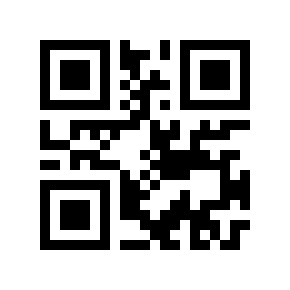

----------------------------------


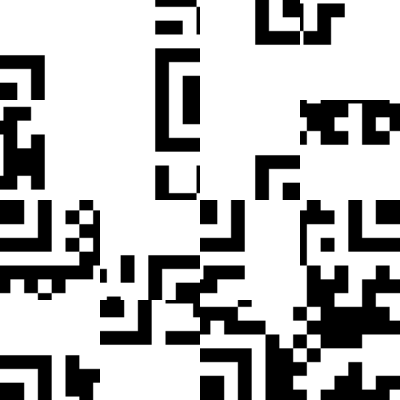

----------------------------------


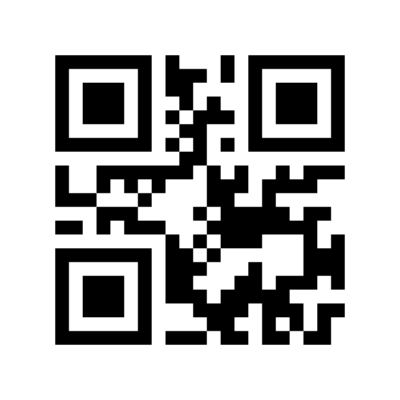

----------------------------------


In [104]:
def display_mat_QR(mat,msg):
  mat=mat.astype(np.uint8)
  cv2_imshow(mat)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  print('----------------------------------')
img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
SIZE=img.shape[0]
display_mat_QR(img,'old QR')
display_mat_QR(scrambled_rebuild,'scrambled qr')
display_mat_QR(og_new,'orginal message')

Permutation used: [0, 2, 10, 9, 11, 13, 14, 3, 12, 4, 5, 1, 7, 6, 8, 15]


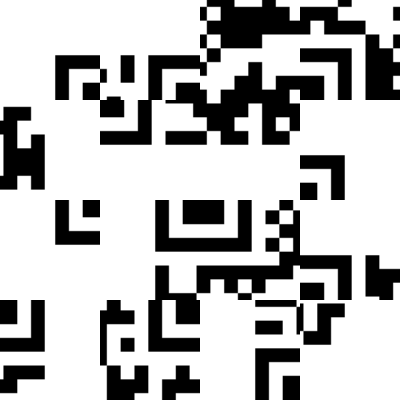

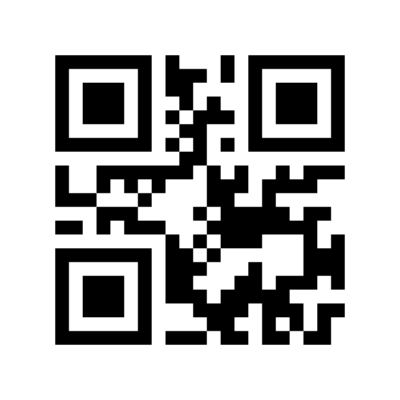

In [107]:
#ALIGNED AND WELL NAMES
import cv2
import numpy as np
import random

# Function to divide the QR image into 16 blocks (4x4)
def divide_image(image_path):
    # Load image using OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale

    # Check if the image was loaded successfully
    if img is None:
        print("Error: Image not found or could not be loaded.")
        return None

    # Resize only if necessary (avoid unnecessary scaling issues)
    if img.shape[0] % 4 != 0 or img.shape[1] % 4 != 0:
        img = cv2.resize(img, (400, 400))

    # Divide the image into 16 blocks
    blocks = []
    block_size = img.shape[0] // 4  # Assuming image size is divisible by 4

    for i in range(4):
        for j in range(4):
            block = img[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]
            blocks.append(block)

    return blocks

# Function to scramble the blocks based on a given permutation
def scramble_blocks(blocks, permutation):
    scrambled_blocks = [None] * len(blocks)
    for i, perm in enumerate(permutation):
        scrambled_blocks[i] = blocks[perm]
    return scrambled_blocks

# Function to reconstruct the scrambled image from blocks
def reconstruct_image(blocks):
    # Assuming blocks are in a 4x4 grid
    rows = []
    for i in range(4):
        rows.append(np.hstack(blocks[i*4:(i+1)*4]))  # Combine 4 blocks horizontally
    return np.vstack(rows)  # Combine the rows vertically

# Function to reverse the scrambling using the inverse of the permutation
def unscramble_blocks(blocks, permutation):
    inverse_permutation = [0] * len(permutation)
    for i, perm in enumerate(permutation):
        inverse_permutation[perm] = i  # Correct inverse mapping

    unscrambled = [None] * len(blocks)
    for i, perm in enumerate(inverse_permutation):
        unscrambled[i] = blocks[perm]  # Correct reassignment
    return unscrambled

# Main function to demonstrate the QR code scrambling and unscrambling
def main(image_path, permutation):
    # Step 1: Divide the QR code into 16 blocks
    blocks = divide_image(image_path)
    if blocks is None:
        return

    # Step 2: Scramble the blocks using the given permutation
    scrambled_blocks = scramble_blocks(blocks, permutation)

    # Step 3: Reconstruct the scrambled QR code
    scrambled_image = reconstruct_image(scrambled_blocks)

    # Save and display scrambled QR code
    cv2.imwrite("scrambled_qr.png", scrambled_image.astype(np.uint8))
    cv2_imshow(scrambled_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Step 4: Unscramble the QR code using the inverse permutation
    unscrambled_blocks = unscramble_blocks(scrambled_blocks, permutation)
    unscrambled_image = reconstruct_image(unscrambled_blocks)

    # Save and display original QR code (after unscrambling)
    cv2.imwrite("unscrambled_qr.png", unscrambled_image.astype(np.uint8))
    cv2_imshow(unscrambled_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
if __name__ == "__main__":
    # Example image path and permutation (16 shuffled numbers)
    image_path = "qr.png"
    permutation = random.sample(range(16), 16)  # Random permutation of 0-15

    print(f"Permutation used: {permutation}")
    main(image_path, permutation)


Permutation used: [2, 14, 6, 0, 8, 1, 9, 10, 5, 11, 3, 12, 4, 15, 13, 7]


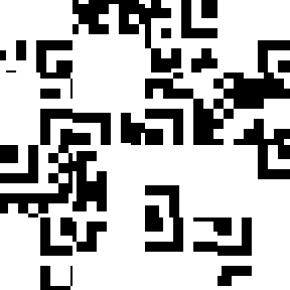

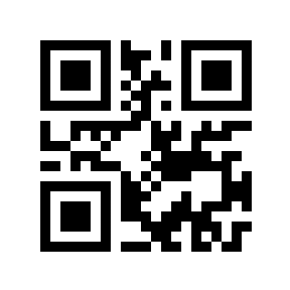

In [106]:
# DUPLICATE
# Function to divide the QR image into 16 blocks (4x4)
def divide_image(image_path):
    # Load image using OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale

    # Check if the image is loaded correctly
    if img is None:
        print(f"Failed to load image at {image_path}")
        return None

    # Divide the image into 16 blocks
    blocks = []
    block_size = img.shape[0] // 4  # Assuming image size is divisible by 4 for simplicity

    for i in range(4):
        for j in range(4):
            block = img[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size]
            blocks.append(block)

    return blocks

# Function to scramble the blocks based on a given permutation
def scramble_blocks(blocks, permutation):
    scrambled_blocks = [None] * len(blocks)
    for i, perm in enumerate(permutation):
        scrambled_blocks[i] = blocks[perm]
    return scrambled_blocks

# Function to reconstruct the scrambled image from blocks
def reconstruct_image(blocks, original_shape):
    # Assuming blocks are in a 4x4 grid
    rows = []
    for i in range(4):
        rows.append(np.hstack(blocks[i*4:(i+1)*4]))  # Combine 4 blocks horizontally
    reconstructed_img = np.vstack(rows)  # Combine the rows vertically

    # Resize back to the original image shape (if necessary)
    reconstructed_img = cv2.resize(reconstructed_img, (original_shape[1], original_shape[0]))

    return reconstructed_img

# Function to reverse the scrambling using the inverse of the permutation
def unscramble_blocks(blocks, permutation):
    inverse_permutation = [None] * len(permutation)
    for i, perm in enumerate(permutation):
        inverse_permutation[perm] = i
    return scramble_blocks(blocks, inverse_permutation)

  # Import cv2_imshow for Colab

# Main function to demonstrate the QR code scrambling and unscrambling
def main(image_path, permutation):
    # Load the image to get its original dimensions
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"Failed to load image at {image_path}")
        return

    original_shape = img.shape

    # Step 1: Divide the QR code into 16 blocks
    blocks = divide_image(image_path)
    if blocks is None:
        return  # Exit if the image couldn't be loaded or divided

    # Step 2: Scramble the blocks using the given permutation
    scrambled_blocks = scramble_blocks(blocks, permutation)

    # Step 3: Reconstruct the scrambled QR code
    scrambled_image = reconstruct_image(scrambled_blocks, original_shape)

    # Save and display scrambled QR code using cv2_imshow
    cv2.imwrite("scrambled_qr.png", scrambled_image)
    cv2_imshow(scrambled_image)  # Use cv2_imshow instead of cv2.imshow
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Step 4: Unscramble the QR code using the inverse permutation
    unscrambled_blocks = unscramble_blocks(scrambled_blocks, permutation)
    unscrambled_image = reconstruct_image(unscrambled_blocks, original_shape)

    # Save and display original QR code (after unscrambling) using cv2_imshow
    cv2.imwrite("unscrambled_qr.png", unscrambled_image)
    cv2_imshow(unscrambled_image)  # Use cv2_imshow instead of cv2.imshow
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
if __name__ == "__main__":
    # Example image path and permutation (16 shuffled numbers)
    image_path = "qr.png"
    random.seed(404)
    permutation = random.sample(range(16), 16)  # Random permutation of 0-15

    print(f"Permutation used: {permutation}")
    main(image_path, permutation)
